In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. SAT 2017 exploratory data analysis

In [67]:
sat_17= pd.read_csv("sat_2017.csv", sep=",")

In [68]:
sat_17.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080


In [4]:
type(sat_17)

pandas.core.frame.DataFrame

In [5]:
sat_17.shape

(51, 5)

In [6]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
sat_17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [8]:
pd.DataFrame(sat_17.dtypes, columns=['DataType'])

,DataType
State,object
Participation,object
Evidence-Based Reading and Writing,int64
Math,int64
Total,int64


Observations:
* sat_17 dataframe has 51 rows and 5 columns
* columns are representing data of "State, Participation, Evidence-Based Reading and Writing, Math, Total"
* each row represnting data of participation rate and average scores of reading, writing, maths and total in each states

In [9]:
# Checking for the null values

In [5]:
sat_17.isnull().sum().sort_values(ascending=False)

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [11]:
# Checking for duplicates
sat_17.duplicated().sum()

0

In [12]:
sat_17[sat_17.duplicated()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


#### Questions based on SAT 2017 EDA

In [13]:
# 1.1 What are the highest 10 participation states in 2017?

In [69]:
sat_17.sort_values(by="Participation", ascending = False).head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
29,New Hampshire,96%,532,520,1052
19,Maine,95%,513,499,1012
12,Idaho,93%,513,493,1005
13,Illinois,9%,559,556,1115
9,Florida,83%,520,497,1017
21,Massachusetts,76%,555,551,1107
39,Rhode Island,71%,539,524,1062
30,New Jersey,70%,530,526,1056
36,Oklahoma,7%,530,517,1047
20,Maryland,69%,536,52,1060


In [15]:
# Converting "Participation" string data type to the integer data type.

In [70]:
def con_numeric(x):
    x = x.replace('%','')
    return x
sat_17['Participation_2017(%)'] = pd.to_numeric(sat_17['Participation'].apply(con_numeric))

In [71]:
sat_17.head(1)

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Participation_2017(%)
0,Alabama,5%,593,572,1165,5


In [18]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
 5   Participation_2017(%)               51 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [72]:
df_subset1= sat_17[["State", "Participation_2017(%)"]]

In [73]:
# The highest 10 participation states in 2017:
df_subset1.sort_values(by="Participation_2017(%)", ascending=False).head(10)

,State,Participation_2017(%)
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96
19,Maine,95
12,Idaho,93
9,Florida,83
21,Massachusetts,76
39,Rhode Island,71


In [21]:
# 1.2 What are the lowest 10 Sat participation states in 2017?

In [74]:
lowest_2017= df_subset1.sort_values(by="Participation_2017(%)", ascending=True).head(10)

In [75]:
lowest_2017

,State,Participation_2017(%)
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
23,Minnesota,3
50,Wyoming,3


In [24]:
# 1.3 Which states has the less than 50% participation rate in 2017?

In [76]:
df_subset1[df_subset1["Participation_2017(%)"] < 50]["State"]

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
5           Colorado
13          Illinois
15              Iowa
16            Kansas
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
31        New Mexico
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
37            Oregon
41      South Dakota
42         Tennessee
44              Utah
48     West Virginia
49         Wisconsin
50           Wyoming
Name: State, dtype: object

In [26]:
# 1.4 What is the mean total score of states where the participation is 100%?

In [77]:
df_subset1.head(1)

,State,Participation_2017(%)
0,Alabama,5


In [78]:
sat_17.head(1)

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Participation_2017(%)
0,Alabama,5%,593,572,1165,5


In [79]:
# Extracting "Total" column from sat_17 into a series_1 and merge series_1 in to a new dataframe called df1.
series_1 = sat_17["Total"]

In [80]:
df1=df_subset1.merge(series_1,left_index=True, right_index=True)

In [81]:
df1.head(1)

,State,Participation_2017(%),Total
0,Alabama,5,1165


In [82]:
mean_score = df1[df1["Participation_2017(%)"] == 100]["Total"].mean()
# mean_score = sat_17[sat_17["Participation_2017(%)"] == 100]["Total"].mean()

In [83]:
math_mean_score = sat_17[sat_17["Participation_2017(%)"] == 100]["Math"].mean()

In [84]:
EBRW_mean_score = sat_17[sat_17["Participation_2017(%)"] == 100]["Evidence-Based Reading and Writing"].mean()

In [85]:
print(f"The mean scores of states where the participation is 100% is as follows: ")
print(f"Total score is {mean_score}")
print(f"Math score is {math_mean_score}")
print(f"EBRW score is {EBRW_mean_score}")

The mean scores of states where the participation is 100% is as follows: 
Total score is 998.0
Math score is 491.75
EBRW score is 506.0


# 2. SAT 2018 exploratory data analysis

In [86]:
sat_18= pd.read_csv("sat_2018.csv", sep=",")

In [87]:
sat_18.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [88]:
type(sat_18)

pandas.core.frame.DataFrame

In [89]:
sat_18.shape

(51, 5)

In [40]:
sat_18.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [41]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Observations:
* sat_18 dataframe has 51 rows and 5 columns
* columns are representing data of "State, Participation, Evidence-Based Reading and Writing, Math, Total"
* each row represnting data of participation rate and average scores of reading, writing, maths and total in each states

In [42]:
# Checking for the null values

In [90]:
sat_18.isnull().sum().sort_values(ascending=False)

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [44]:
# Checking for the duplicates

In [45]:
sat_18.duplicated().sum()

0

In [91]:
sat_18[sat_18.duplicated()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [92]:
sat_18["Participation_2018(%)"] = pd.to_numeric(sat_18['Participation'].apply(con_numeric))

In [93]:
subset_2= sat_18[["State", "Participation_2018(%)", "Total"]]

#### Questions based on SAT 2018 EDA

In [49]:
# 2.1 What are the highest 10 participation states in 2018?

In [94]:
subset_2.sort_values(by="Participation_2018(%)", ascending=False).head(10)

,State,Participation_2018(%),Total
5,Colorado,100,1025
6,Connecticut,100,1053
7,Delaware,100,998
22,Michigan,100,1011
12,Idaho,100,1001
19,Maine,99,1013
13,Illinois,99,1019
39,Rhode Island,97,1018
29,New Hampshire,96,1063
8,District of Columbia,92,977


In [51]:
# 2.2 What are the lowest 20 participation states in 2018?

In [95]:
lowest_2018 = subset_2.sort_values(by="Participation_2018(%)", ascending=True).head(20)

In [96]:
lowest_2018.rename(columns={"State": "STATE"}, inplace=True) 

In [54]:
# 2.3 Which states has the less than 50% participation rate in 2018?

In [97]:
subset_2[subset_2["Participation_2018(%)"] < 50]["State"]

0           Alabama
1            Alaska
2           Arizona
3          Arkansas
15             Iowa
16           Kansas
17         Kentucky
18        Louisiana
23        Minnesota
24      Mississippi
25         Missouri
26          Montana
27         Nebraska
28           Nevada
31       New Mexico
34     North Dakota
35         Oklahoma
36             Ohio
37           Oregon
41     South Dakota
42        Tennessee
44             Utah
48    West Virginia
49        Wisconsin
50          Wyoming
Name: State, dtype: object

In [56]:
# 2.4 Find out more stat details about sat participation in 2018. 

In [98]:
subset_2.describe()

,Participation_2018(%),Total
count,51.000000,51.000000
mean,45.745098,1120.019608
std,37.314256,94.155083
min,2.000000,977.000000
25%,4.500000,1057.500000
50%,52.000000,1098.000000
75%,77.500000,1204.000000
max,100.000000,1298.000000


# 3. SAT 2019 exploratory data analysis

In [104]:
sat_19= pd.read_csv("sat_2019.csv", sep=",")

In [105]:
sat_19.head(10)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [106]:
type(sat_19)

pandas.core.frame.DataFrame

In [61]:
sat_19.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [62]:
sat_19.shape

(53, 5)

In [63]:
sat_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [31]:
sat_19.describe()

,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


Observations:
* sat_19 dataframe has 53 rows and 5 columns
* columns are representing data of "State, Participation, Evidence-Based Reading and Writing, Math, Total"
* each row represnting data of participation rate and average scores of reading, writing, maths and total in each states

In [65]:
# Checking for null values

In [66]:
sat_19.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [67]:
# Checking for the duplicates

In [107]:
sat_19.duplicated().sum()

0

In [108]:
sat_19[sat_19.duplicated()]

,State,Participation Rate,EBRW,Math,Total


In [109]:
sat_19.rename(columns={"Participation Rate": "Participation"}, inplace=True)

In [110]:
sat_19["Participation"].head()

0     7%
1    41%
2    31%
3     6%
4    63%
Name: Participation, dtype: object

In [111]:
sat_19 = sat_19.drop([39,47])

In [73]:
sat_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          51 non-null     object
 1   Participation  51 non-null     object
 2   EBRW           51 non-null     int64 
 3   Math           51 non-null     int64 
 4   Total          51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [112]:
sat_19["Participation_2019(%)"] = pd.to_numeric(sat_19["Participation"].apply(con_numeric))

In [113]:
subset_3= sat_19[["State", "Participation_2019(%)", "Total"]]

In [114]:
subset_3.head()

,State,Participation_2019(%),Total
0,Alabama,7,1143
1,Alaska,41,1097
2,Arizona,31,1134
3,Arkansas,6,1141
4,California,63,1065


#### Questions based on SAT 2019 EDA

In [115]:
# 3.1 What are the highest 10 participation states in 2019?
subset_3.sort_values(by="Participation_2019(%)", ascending=False).head(10)

,State,Participation_2019(%),Total
40,Rhode Island,100,995
13,Illinois,100,1013
22,Michigan,100,1003
5,Colorado,100,1024
6,Connecticut,100,1046
7,Delaware,100,985
9,Florida,100,999
12,Idaho,100,993
19,Maine,99,1013
50,West Virginia,99,943


In [116]:
# 3.2 What are the lowest 10 participation states in 2019?
lowest_2019 = subset_3.sort_values(by="Participation_2019(%)", ascending=True).head(10)

In [117]:
lowest_2019.rename(columns={"State": "STATE"}, inplace=True) 

In [118]:
lowest_2019

,STATE,Participation_2019(%),Total
34,North Dakota,2,1263
52,Wyoming,3,1238
42,South Dakota,3,1268
27,Nebraska,3,1260
51,Wisconsin,3,1283
24,Mississippi,3,1237
15,Iowa,3,1244
45,Utah,4,1230
23,Minnesota,4,1284
17,Kentucky,4,1232


In [81]:
# 3.3 What is the highest average score in maths in 2019? and which state?

In [119]:
math = sat_19.groupby(["State"]).mean().sort_values(by="Math", ascending=False).head(1)

In [120]:
print(f"{math[['Math']]}")

            Math
State           
Wisconsin  648.0


In [ ]:
# 3.4 What is the highest average score in EBRW in 2019? and which state?

In [121]:
Ebrw = sat_19.groupby(["State"]).mean().sort_values(by="EBRW", ascending=False).head(1)
print(f"{Ebrw[['EBRW']]}")

            EBRW
State           
Minnesota  636.0


In [ ]:
# 3.5 Use a bar chart to visualize the states that has less than average 10% of sat participation in 2019

In [122]:
lowest_particpating_states_19 = sat_19[sat_19["Participation_2019(%)"] < 10]["State"]

In [50]:
type(lowest_particpating_states_19)

pandas.core.series.Series

In [51]:
lowest_particpating_states_19.shape 

(17,)

In [123]:
new_dataframe = sat_19.groupby(["State"]).mean().sort_values(by="Participation_2019(%)", ascending=True).head(17)

In [106]:
type(new_dataframe)

pandas.core.frame.DataFrame

In [124]:
new_dataframe

,EBRW,Math,Total,Participation_2019(%)
State,,,,
North Dakota,627.0,636.0,1263.0,2.0
Wyoming,623.0,615.0,1238.0,3.0
South Dakota,633.0,635.0,1268.0,3.0
Nebraska,628.0,631.0,1260.0,3.0
Wisconsin,635.0,648.0,1283.0,3.0
Mississippi,628.0,608.0,1237.0,3.0
Iowa,622.0,622.0,1244.0,3.0
Utah,614.0,615.0,1230.0,4.0
Minnesota,636.0,648.0,1284.0,4.0


In [125]:
Lowest_participation_2019= new_dataframe[["Participation_2019(%)"]]

In [126]:
import pylab

Text(0.5, 1.0, 'Lowest participation states in 2019 (average participation less than 10%)')

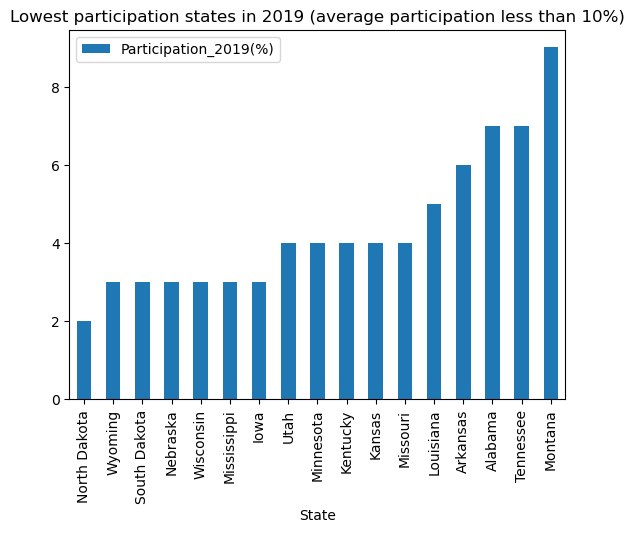

In [127]:
Lowest_participation_2019.plot(kind="bar")
pylab.xlabel("State")
pylab.title("Lowest participation states in 2019 (average participation less than 10%)")

# Participation rates comparison over 3 years

In [ ]:
# Combine all three years lowest participating states in to a one data frame.

In [128]:
new_dataframe_1 = pd.concat([lowest_2017, lowest_2018, lowest_2019], axis=1, join="inner")

In [129]:
new_dataframe_1.head(10)

,State,Participation_2017(%),STATE,Participation_2018(%),Total,STATE,Participation_2019(%),Total
34,North Dakota,2,North Dakota,2,1283,North Dakota,2,1263
24,Mississippi,2,Mississippi,3,1236,Mississippi,3,1237
15,Iowa,2,Iowa,3,1265,Iowa,3,1244
27,Nebraska,3,Nebraska,3,1252,Nebraska,3,1260
23,Minnesota,3,Minnesota,4,1298,Minnesota,4,1284


In [130]:
new_dataframe_2 = new_dataframe_1.drop(columns=["Total"])

In [131]:
new_dataframe_2.head(1)

,State,Participation_2017(%),STATE,Participation_2018(%),STATE,Participation_2019(%)
34,North Dakota,2,North Dakota,2,North Dakota,2


In [132]:
new_dataframe_3 = new_dataframe_2.drop(columns=["STATE"])

In [133]:
# adding few more rows to the dataframe using loc method
new_dataframe_3.loc["50"] = ["Wyoming", 3, 3, 3]
new_dataframe_3.loc["16"] = ["Kansas", 4, 4, 4]
new_dataframe_3.loc["17"] = ["Kentucky", 4, 4, 4]
new_dataframe_3.loc["42"] = ["Tennessee", 5, 6, 7]
new_dataframe_3.loc["26"] = ["Montana", 10, 10, 9]

In [134]:
new_dataframe_3

,State,Participation_2017(%),Participation_2018(%),Participation_2019(%)
34,North Dakota,2,2,2
24,Mississippi,2,3,3
15,Iowa,2,3,3
27,Nebraska,3,3,3
23,Minnesota,3,4,4
50,Wyoming,3,3,3
16,Kansas,4,4,4
17,Kentucky,4,4,4
42,Tennessee,5,6,7
26,Montana,10,10,9


In [135]:
df = new_dataframe_3.set_index(["State"])

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

Text(0.5, 1.0, 'Participation rates comparison among the lowest participation states')

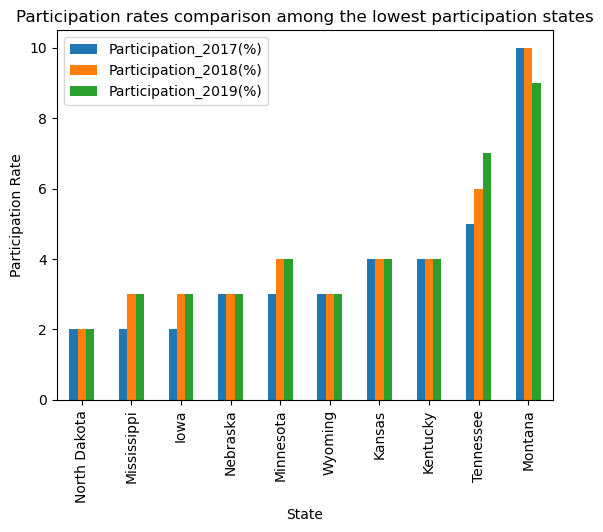

In [137]:
df.plot(kind="bar")
pylab.ylabel("Participation Rate")
pylab.title("Participation rates comparison among the lowest participation states")

#### Observations:

Among the states which has lowest participation rates: 

- Sat participation has increased in 2018 and 2019 in most of the states
- In Montana participation has decresed in 1% in 2019
- In Tennessee Participation has increased within two years
- North Dakota has the lowest participation rate which is 2% constantly over three years
- Apart from the North Dakota Nebraska, Wyoming, Kansas and Kentucky participation rates has been stable to less than 5% over the years.

#### Recommendations based on participation rates are:

* States that is increasing and yet has less than 5% of participation rate such as Mississippi, Iowa and Minnesota can be offered more fee waivers for students.
* For the states which has no improvement of participation over 3 years such as North Dakota, Nebraska and Wyoming should be provided with more financial provisions for increasing the awareness of SAT program such as organising seminars and workshops in each states.
* Working collobaratively with the schools to increase the publicity regarding financial assistant available for students relating to SAT specialy targeting low income students who achieveing high scores.
* For the states like Montana which participation rate is unstable in 2019 need more financial allocations to conduct research to find out the reason for decline participation rates

# 4. SAT 2019 by intended college major EDA

In [138]:
college_major_sat= pd.read_csv("sat_2019_by_intended_college_major.csv", sep=",")

In [139]:
college_major_sat.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [140]:
college_major_sat.shape

(38, 6)

In [264]:
college_major_sat.isnull().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

In [265]:
college_major_sat.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

#### Questions based on intended college major EDA

In [141]:
# 4.1 In which streams most of the students have taken the SAT test? Create a pie chart to visualize data.

In [142]:
def remove_comma(x):
    x = x.replace(',','')
    return x

college_major_sat["Test_takers"] = pd.to_numeric(college_major_sat["TestTakers"].apply(remove_comma))

In [143]:
college_major_sat.head(1)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math,Test_takers
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481,24913


In [144]:
data_frame = college_major_sat.sort_values(by="Test_takers", ascending=False).head(5)

In [145]:
# The indended college major streams that most students have taken SAT test.
data_frame[["IntendedCollegeMajor", "Test_takers"]]

,IntendedCollegeMajor,Test_takers
14,Health Professions and related Clinical Sciences,331026
4,"Business, Management, Marketing, and Related S...",221523
9,Engineering,194127
3,Biological and Biomedical Sciences,155834
35,"Visual and Performing Arts, General",130642


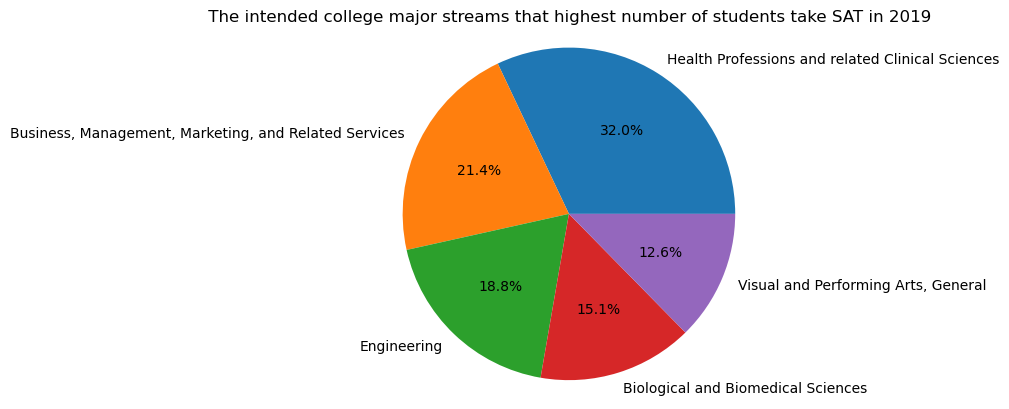

In [146]:
# Creating a pie chart to demonstrate the streams of Intended College Major that most of the students have taken in 2019.
labels = 'Health Professions and related Clinical Sciences', 'Business, Management, Marketing, and Related Services', 'Engineering', 'Biological and Biomedical Sciences', "Visual and Performing Arts, General"
amount_of_TT = [331026, 221523, 194127, 155834, 130642]
 
fig1, ax1 = plt.subplots()
ax1.pie(amount_of_TT, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  
pylab.title(" The intended college major streams that highest number of students take SAT in 2019")

plt.show()

In [ ]:
# 4.2 In which indended college major streams that least of the students have taken SAT test?

In [147]:
least_streams = college_major_sat.sort_values(by="Test_takers", ascending=True).head(10)

In [148]:
least_streams.head(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math,Test_takers
18,Library Science/Librarianship,283,0%,1105,577,527,283
28,Precision Production,319,0%,932,466,466,319
34,Transportation and Materials Moving,"1,105",0%,1019,511,508,1105
33,Theology and Religious Vocations,"1,991",0%,1096,561,535,1991
7,"Construction Trades, General","2,500",0%,919,459,460,2500


In [330]:
least_streams["IntendedCollegeMajor"].head(10)

18                   Library Science/Librarianship
28                            Precision Production
34             Transportation and Materials Moving
33                Theology and Religious Vocations
7                     Construction Trades, General
2       Area, Ethnic, Cultural, and Gender Studies
22                 Multi/Interdisciplinary Studies
26                Philosophy and Religious Studies
12     Family and Consumer Sciences/Human Sciences
20    Mechanic and Repair Technologies/Technicians
Name: IntendedCollegeMajor, dtype: object

#### Observations:

According to the pie chart above most of the test takers are taking SAT intended collage major in Health Professions and related Clinical Sciences. Students' next preference is Business, Management, Marketing, and Related Services. According to the data in 4.2 the least of the test takers are for following intended college major streams.
* Library Science/Librarianship
* Precision Production
* Transportation and Materials Moving
* Theology and Religious Vocations	
* Construction Trades, General	


#### Recommendations based on intended college major EDA are:

Based on the above observations, to increase SAT participation in specific intended major college streams which have low SAT participation I suggest to consider offering financial grant for the institutions which offer them to make SAT compulsory requirement to entrol for those streams. According to the analysis the intended major college streams which have low SAT participation are listed below:

* Library Science/Librarianship
* Precision Production
* Transportation and Materials Moving
* Theology and Religious Vocations
* Construction Trades, General
* Area, Ethnic, Cultural, and Gender Studies
* Multi/Interdisciplinary Studies
* Philosophy and Religious Studies
* Family and Consumer Sciences/Human Sciences
* Mechanic and Repair Technologies/Technicians

# 5. SAT college acceptance EDA

In [45]:
sat_college= pd.read_csv("sat_act_by_college.csv", sep=",")

In [46]:
sat_college.head(1)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35


In [47]:
sat_college.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

In [48]:
# Filling missing values with 0
sat_college.fillna(0, inplace=True)

In [49]:
sat_college.isnull().sum()

School                            0
Test Optional?                    0
Applies to Class Year(s)          0
Policy Details                    0
Number of Applicants              0
Accept Rate                       0
SAT Total 25th-75th Percentile    0
ACT Total 25th-75th Percentile    0
dtype: int64

In [63]:
sat_college.head(1)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35


In [53]:
df_sat_college = sat_college.drop(columns=["Applies to Class Year(s)", "Policy Details", "SAT Total 25th-75th Percentile", "ACT Total 25th-75th Percentile"])

In [93]:
df_sat_college.head(1)

,School,Test Optional?,Number of Applicants,Accept Rate
0,Stanford University,Yes,47452,4.3%


In [280]:
df_sat_college.shape

(416, 4)

In [283]:
df_sat_college.isnull().sum()

School                  0
Test Optional?          0
Number of Applicants    0
Accept Rate             0
dtype: int64

In [285]:
df_sat_college.dtypes

School                  object
Test Optional?          object
Number of Applicants     int64
Accept Rate             object
dtype: object

#### Questions based on SAT college acceptance EDA

In [149]:
# 5.1 How many number of schools that SAT test is considered as optional?
df_sat_college[df_sat_college["Test Optional?"] == "Yes"][["School"]].count()

School    347
dtype: int64

In [150]:
# 5.2 How many number of schools that SAT test is considered as compulsory?
df_sat_college[df_sat_college["Test Optional?"] == "No"][["School"]].count()

School    26
dtype: int64

In [151]:
# Which school has highest number of apllicants?
df_sat_college.sort_values(by="Number of Applicants", ascending=False).head(1)

,School,Test Optional?,Number of Applicants,Accept Rate
24,University of California—​Los Angeles,Yes,111322,12.3%


In [ ]:
# 5.3 Is there a connection between Number of Applicants and Accept Rate? Plot them with a scatter plot

<AxesSubplot:xlabel='Number of Applicants', ylabel='Accept Rate'>

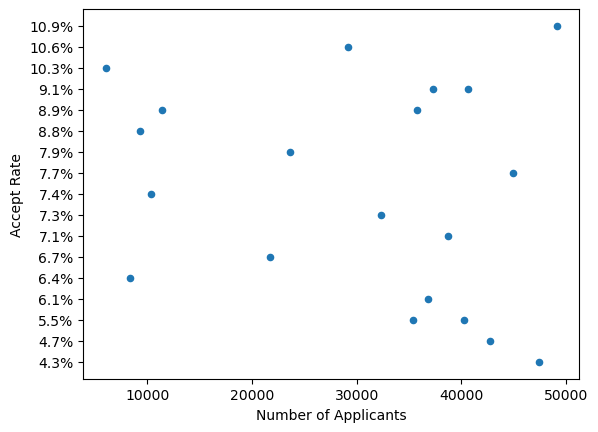

In [152]:
df_sat_college.head(20).plot(kind="scatter", x="Number of Applicants", y="Accept Rate")

There is no connection between Number of Applicants and Accept Rate. Pattern is random